In [123]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [124]:
data = np.load("cleandata.npy", allow_pickle=True)

#centered
ss = StandardScaler()
data_centered = ss.fit_transform(data)


# PCA
pca = PCA(n_components=8)
pca.fit(data_centered)
data_mean = pca.mean_
data_withmax = pca.components_
data_PCA = pca.transform(data_centered)
data_components = pca.components_



In [125]:
#The parameters For Gausssian
sigma = np.array([11.0403,12.7388, 15.2866, 16.5605, 16.5605, 16.9851, 21.2314, 22.0807 ])
mu = np.array([415, 445, 480, 515, 555, 590, 630, 680])

In [126]:
def Gaussianfunctions(x,sigma, mu):
    return np.exp((-((x - mu)**2)) / (2 * sigma**2)) / (np.sqrt(2 * np.pi * sigma**2))

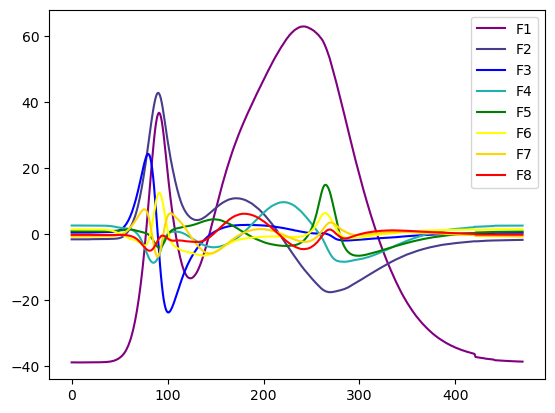

In [127]:
plt.plot(data_PCA[:,0], label='F1', color= "purple" )
plt.plot(data_PCA[:,1], label='F2', color= "darkslateblue")
plt.plot(data_PCA[:,2], label='F3', color= "blue")
plt.plot(data_PCA[:,3], label='F4', color= "lightseagreen")
plt.plot(data_PCA[:,4], label='F5', color= "green")
plt.plot(data_PCA[:,5], label='F6', color= "yellow")
plt.plot(data_PCA[:,6], label='F7', color= "gold")
plt.plot(data_PCA[:,7], label='F8', color= "red")

plt.legend()
plt.show()


compute

In [128]:
data_components # 8 components after PCA

array([[ 0.02291181,  0.02229322,  0.02241721, ...,  0.01085849,
        -0.00080413,  0.010382  ],
       [-0.03820163, -0.04918927, -0.04675979, ...,  0.04919584,
         0.03471405,  0.05060548],
       [ 0.00689418,  0.00300467,  0.00403528, ..., -0.09975949,
         0.00478514, -0.09804882],
       ...,
       [ 0.03818739,  0.04235825,  0.04469774, ..., -0.04019059,
        -0.17049411, -0.04136928],
       [ 0.00403016,  0.02169003,  0.01965291, ...,  0.10715773,
         0.02987978,  0.10581573],
       [-0.11282886, -0.06495866, -0.07892375, ..., -0.07628098,
        -0.01417698, -0.08315831]])

In [129]:
"""
F = np.array([
    [11.0403, 415],
    [12.7388, 445],
    [15.2866, 480],
    [16.5605, 515],
    [16.5605, 555],
    [16.9851, 590],
    [21.2314, 630],
    [22.0807, 680]
    ])
"""

F = np.array([sigma, mu])
print(F.shape)

(2, 8)


In [130]:
print(data_components.shape)
print(F.shape)
print(data_PCA.shape)

(8, 1494)
(2, 8)
(471, 8)


$\hat{a_{i}} =  M_{-1} (r - r_{\mu})$    

$M_{-1} = F.T * B$

In [131]:
M = Gaussianfunctions(data_PCA.T, sigma.reshape(-1,1), mu.reshape(-1,1)) #(8,471)

M_pinv = np.linalg.pinv(M) #伪逆矩阵(471,8)


Extraction s

In [133]:
s = np.mean(data_PCA, axis=0) #(8,1)
r = Gaussianfunctions(s, sigma.T, mu.T) #(1*8)

r_mu = np.mean(r)

caculate $\hat{a_{i}}$

In [134]:
a_hat = np.dot(M_pinv , (r - r_mu).T)

In [135]:
a_hat.shape

(471,)